In [1]:
import numpy as np

import pandas as pd
import seaborn as sns
import keras
import tensorflow as tf
from keras.models import Model
from keras.layers import Input, LSTM, Dense 
from keras.layers import Input, Dense
from keras import backend as K
from keras.models import load_model

##plot and visualize the data against time and observe how the feb 14-21 data is different from the rest of the data   

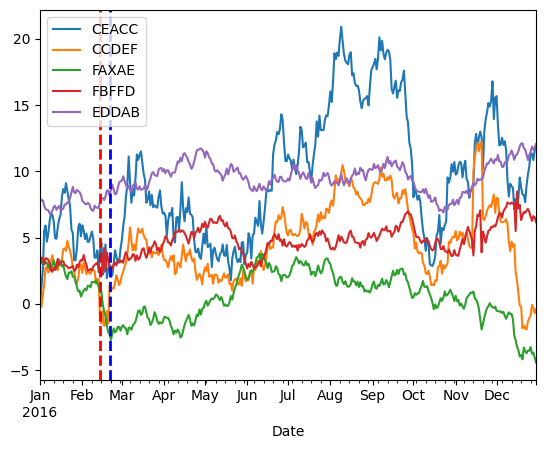

In [2]:
import matplotlib.pyplot as plt
df=pd.read_csv('anomaly_detection2.csv',parse_dates=['Date'])
# df_new=df.drop(['Date'],axis=1)
# df_new.plot()
df.set_index('Date',inplace=True)
df.plot()
plt.axvline(pd.to_datetime('2016-02-14'), color='r', linestyle='--', linewidth=2, label='Event 1')
plt.axvline(pd.to_datetime('2016-02-21'), color='b', linestyle='--', linewidth=2, label='Event 2')
plt.show()

In [3]:

import plotly.express as px
px.line(df,x=df.index,y=['CEACC', 'CCDEF', 'FAXAE', 'FBFFD', 'EDDAB'])


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'variable=CEACC<br>Date=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'CEACC',
              'line': {'color': '#636efa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'CEACC',
              'showlegend': True,
              'type': 'scattergl',
              'x': array([datetime.datetime(2016, 1, 1, 0, 0),
                          datetime.datetime(2016, 1, 2, 0, 0),
                          datetime.datetime(2016, 1, 3, 0, 0), ...,
                          datetime.datetime(2016, 12, 28, 0, 0),
                          datetime.datetime(2016, 12, 29, 0, 0),
                          datetime.datetime(2016, 12, 30, 0, 0)], dtype=object),
              'xaxis': 'x',
              'y': array([ 0.        ,  1.23225977,  2.54012919, ..., 10.84136698, 11.58593208,
                          11.99195242]),
              'yaxis': 'y'},
             {'hovertemplate': 'variable=CCDEF<br>Date=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'CCDEF',
              'line': {'color': '#EF553B', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'CCDEF',
              'showlegend': True,
              'type': 'scattergl',
              'x': array([datetime.datetime(2016, 1, 1, 0, 0),
                          datetime.datetime(2016, 1, 2, 0, 0),
                          datetime.datetime(2016, 1, 3, 0, 0), ...,
                          datetime.datetime(2016, 12, 28, 0, 0),
                          datetime.datetime(2016, 12, 29, 0, 0),
                          datetime.datetime(2016, 12, 30, 0, 0)], dtype=object),
              'xaxis': 'x',
              'y': array([ 0.        , -0.21730517,  0.60670884, ..., -0.31712651, -0.71042634,
                          -0.39958795]),
              'yaxis': 'y'},
             {'hovertemplate': 'variable=FAXAE<br>Date=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'FAXAE',
              'line': {'color': '#00cc96', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'FAXAE',
              'showlegend': True,
              'type': 'scattergl',
              'x': array([datetime.datetime(2016, 1, 1, 0, 0),
                          datetime.datetime(2016, 1, 2, 0, 0),
                          datetime.datetime(2016, 1, 3, 0, 0), ...,
                          datetime.datetime(2016, 12, 28, 0, 0),
                          datetime.datetime(2016, 12, 29, 0, 0),
                          datetime.datetime(2016, 12, 30, 0, 0)], dtype=object),
              'xaxis': 'x',
              'y': array([ 3.        ,  3.19378003,  3.18095   , ..., -3.68039695, -4.04611568,
                          -4.43606537]),
              'yaxis': 'y'},
             {'hovertemplate': 'variable=FBFFD<br>Date=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'FBFFD',
              'line': {'color': '#ab63fa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'FBFFD',
              'showlegend': True,
              'type': 'scattergl',
              'x': array([datetime.datetime(2016, 1, 1, 0, 0),
                          datetime.datetime(2016, 1, 2, 0, 0),
                          datetime.datetime(2016, 1, 3, 0, 0), ...,
                          datetime.datetime(2016, 12, 28, 0, 0),
                          datetime.datetime(2016, 12, 29, 0, 0),
                          datetime.datetime(2016, 12, 30, 0, 0)], dtype=object),
              'xaxis': 'x',
              'y': array([3.        , 3.48999178, 3.46481115, ..., 6.61749071, 6.51904081,
                          6.15513884]),
              'yaxis': 'y'},
             {'hovertemplate': 'variable=EDDAB<br>Date=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'EDDAB',
    

###Data splitting

In [4]:
df.columns

Index(['CEACC', 'CCDEF', 'FAXAE', 'FBFFD', 'EDDAB'], dtype='object')

In [5]:
##Training data is between (01/01/2016 to 09/30/2016) and test period: (10/01/2016 to 12/30/2016)
# df.drop(['EDDAB'],axis=1,inplace=True)
##merge two periods in training and validation data to accoutnf or data dift after July 

train_df = df.loc['2016-03-15':'2016-08-15']
val_df=df.loc['2016-08-16':'2016-09-30']
anom_test_df=df.loc['2016-02-10':'2016-02-26']
norm_test_df = df.loc['2016-01-01':'2016-02-05']
monitored_period_df=df.loc['2016-01-01':'2016-09-30']
train_df.head(5)

test_df=df.loc['2016-10-01':'2016-12-30']


In [6]:
norm_test_df.index.min()

Timestamp('2016-01-01 00:00:00')

In [7]:
##create sequences out of time series data
def create_seq_data(data,seq_len):
    seq_data=[]
    for i in range(len(data)-seq_len):
        seq_data.append(data[i:i+seq_len])
    return np.array(seq_data)

In [8]:
seq_len=3
X_train_orig=create_seq_data(train_df,seq_len)
X_val_orig=create_seq_data(val_df,seq_len)
X_norm_test_orig=create_seq_data(norm_test_df,seq_len)
X_anom_test_orig=create_seq_data(anom_test_df,seq_len)

X_test_orig=create_seq_data(test_df,seq_len)
X_monitored_period_orig=create_seq_data(monitored_period_df,seq_len)

X_train=X_train_orig.reshape(-1,seq_len,train_df.shape[1])
# X_train=np.delete(X_train,[0,1],2).astype(float)
X_val=X_val_orig.reshape(-1,seq_len,val_df.shape[1])
X_norm_test=X_norm_test_orig.reshape(-1,seq_len,norm_test_df.shape[1])
X_anom_test=X_anom_test_orig.reshape(-1,seq_len,anom_test_df.shape[1])
X_monitored_period=X_monitored_period_orig.reshape(-1,seq_len,monitored_period_df.shape[1])

print(X_train.shape,X_val.shape,X_norm_test.shape,X_anom_test.shape)
print(X_anom_test)

X_test=X_test_orig.reshape(-1,seq_len,test_df.shape[1])

(151, 3, 5) (43, 3, 5) (33, 3, 5) (14, 3, 5)
[[[ 3.47375743  2.46131873  1.63080201  2.94813226  7.40664464]
  [ 3.50540838  1.51870379  1.77735609  3.01439663  7.26016159]
  [ 4.0316598   1.87873178  1.55120058  3.10151955  7.26017837]]

 [[ 3.50540838  1.51870379  1.77735609  3.01439663  7.26016159]
  [ 4.0316598   1.87873178  1.55120058  3.10151955  7.26017837]
  [ 2.39837124  1.86555262  1.31415201  2.70164389  7.22802034]]

 [[ 4.0316598   1.87873178  1.55120058  3.10151955  7.26017837]
  [ 2.39837124  1.86555262  1.31415201  2.70164389  7.22802034]
  [ 4.04372489 -1.21956506  0.90519526  2.28898941  7.7092109 ]]

 [[ 2.39837124  1.86555262  1.31415201  2.70164389  7.22802034]
  [ 4.04372489 -1.21956506  0.90519526  2.28898941  7.7092109 ]
  [ 4.57628224 -1.49207064  0.89978188  2.13057487  7.9684867 ]]

 [[ 4.04372489 -1.21956506  0.90519526  2.28898941  7.7092109 ]
  [ 4.57628224 -1.49207064  0.89978188  2.13057487  7.9684867 ]
  [ 2.21029403 -0.57662053 -0.04408993  3.03775938 

In [9]:
##retain the time stamps of vectors for future use
# X_train_dates=train_df.index[seq_len:]

# X_train_dates=pd.DataFrame({'Dates':train_df.index[seq_len:], 'CEACC':X_train_orig[:,0,0],'CCDEF':X_train_orig[:,0,1],'FAXAE':X_train_orig[:,0,2],'FBFFD':X_train_orig[:,0,3],'EDDAB':X_train_orig[:,0,4]})
# X_train_dates
X_anom_test_dates=pd.DataFrame({'Dates':anom_test_df.index[seq_len:], 'CEACC':X_anom_test_orig[:,0,0],'CCDEF':X_anom_test_orig[:,0,1],'FAXAE':X_anom_test_orig[:,0,2],'FBFFD':X_anom_test_orig[:,0,3]}) 
X_anom_test_dates

,Dates,CEACC,CCDEF,FAXAE,FBFFD
0,2016-02-13,3.473757,2.461319,1.630802,2.948132
1,2016-02-14,3.505408,1.518704,1.777356,3.014397
2,2016-02-15,4.031660,1.878732,1.551201,3.101520
3,2016-02-16,2.398371,1.865553,1.314152,2.701644
4,2016-02-17,4.043725,-1.219565,0.905195,2.288989
5,2016-02-18,4.576282,-1.492071,0.899782,2.130575
6,2016-02-19,2.210294,-0.576621,-0.044090,3.037759
7,2016-02-20,2.482837,-1.658767,-0.550546,4.215023
8,2016-02-21,4.480263,-1.545013,-0.934196,2.485914
9,2016-02-22,1.943677,-0.539503,-1.623672,3.877839


In [10]:
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, LSTM, Dense, TimeDistributed,BatchNormalization,RepeatVector
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam
# from sklearn.metrics import mean_squared_error





In [11]:
# Set random seed for reproducibility 
np.random.seed(42) 
tf.random.set_seed(42)

n_features=X_train.shape[2]
n_timesteps=X_train.shape[1]
batch_size=16
early_stopping=EarlyStopping(monitor='val_loss',patience=2,restore_best_weights=True)
loss='mae'
metrics=['mae']
model=tf.keras.models.Sequential([
    layers.LSTM(8,return_sequences=True,input_shape=(seq_len,n_features)),
    # layers.LSTM(16,return_sequences=True),
    layers.LSTM(8,return_sequences=False,name="Latent"),
    RepeatVector(seq_len),
    #layers.LSTM(8,return_sequences=True),
    # layers.LSTM(16,return_sequences=True),
    layers.LSTM(8,return_sequences=True),
    layers.TimeDistributed(layers.Dense(n_features))
    ])
model.compile(optimizer='adam',loss=loss,metrics=metrics)
history=model.fit(X_train,X_train,epochs=500,batch_size=batch_size,validation_data=(X_val,X_val),shuffle=True,callbacks=[early_stopping])


c:\Users\ccb\OneDrive\Desktop\Avatheon\v_env\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 87ms/step - loss: 5.9149 - mae: 5.9149 - val_loss: 8.4890 - val_mae: 8.4890
Epoch 2/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 5.8937 - mae: 5.8937 - val_loss: 8.4638 - val_mae: 8.4638
Epoch 3/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 5.8689 - mae: 5.8689 - val_loss: 8.4311 - val_mae: 8.4311
Epoch 4/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 5.8367 - mae: 5.8367 - val_loss: 8.3869 - val_mae: 8.3869
Epoch 5/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 5.7920 - mae: 5.7920 - val_loss: 8.3255 - val_mae: 8.3255
Epoch 6/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 5.7280 - mae: 5.7280 - val_loss: 8.2388 - val_mae: 8.2388
Epoch 7/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 5.6348 - mae: 5.6348 - val_loss: 8.1156 - val_mae: 8.1156
Epoch 8/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 5.5024 - mae: 5.5024 - val_loss: 7.9507 - val_mae: 7.9507
Epoch 9/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - lo

[5.826472759246826, 5.804925918579102, 5.779237747192383, 5.745294094085693, 5.697887420654297, 5.629313945770264, 5.5295634269714355, 5.390206813812256, 5.214967727661133, 5.018734455108643, 4.8125691413879395, 4.604955196380615, 4.406175136566162, 4.226054668426514, 4.068665981292725, 3.931974172592163, 3.811586856842041, 3.7041115760803223, 3.6069953441619873, 3.5183379650115967, 3.4368157386779785, 3.3614988327026367, 3.290900945663452, 3.2255959510803223, 3.1649394035339355, 3.1086506843566895, 3.0566952228546143, 3.00870680809021, 2.9638113975524902, 2.922053575515747, 2.8829822540283203, 2.8460192680358887, 2.810964822769165, 2.7776055335998535, 2.7453715801239014, 2.714142322540283, 2.6838066577911377, 2.654341697692871, 2.6255149841308594, 2.5974156856536865, 2.5699374675750732, 2.542963743209839, 2.5165092945098877, 2.490401268005371, 2.4645211696624756, 2.438891649246216, 2.413569688796997, 2.38851261138916, 2.3637239933013916, 2.33921480178833, 2.31510591506958, 2.291391372

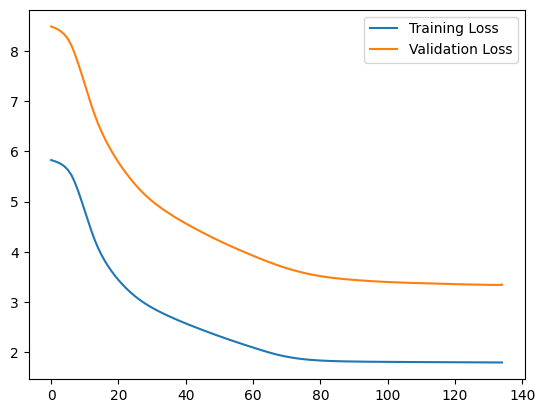

In [12]:
print(history.history["loss"])
plt.plot(history.history["loss"],label="Training Loss")
plt.plot(history.history["val_loss"],label="Validation Loss")
plt.legend()

In [13]:
recons_norm_test_data=model.predict(X_norm_test)
norm_test_data_loss=tf.keras.losses.mae(recons_norm_test_data,X_norm_test)

recons_anom_test_data=model.predict(X_anom_test)
anom_test_data_loss=tf.keras.losses.mae(recons_anom_test_data,X_anom_test)

norm_test_data_loss_mean=np.mean(norm_test_data_loss,axis=1)
anom_test_data_loss_mean=np.mean(anom_test_data_loss,axis=1)




2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 482ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


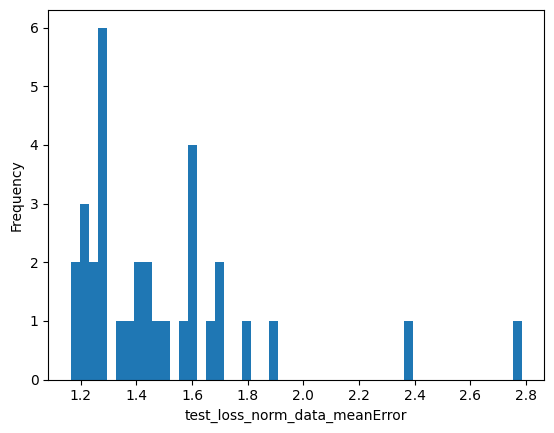

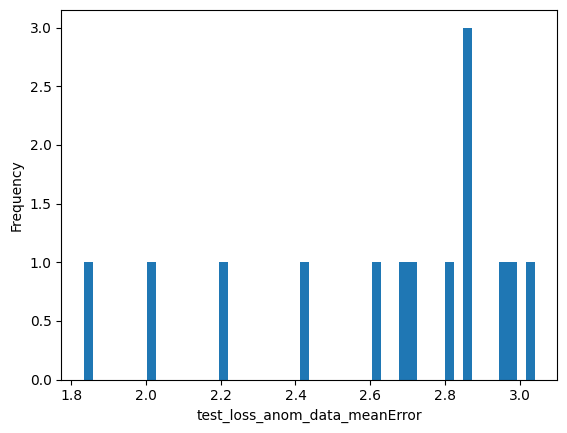

In [14]:
test_loss_norm_data_mean=np.mean(norm_test_data_loss,axis=1)
test_loss_anom_data_mean=np.mean(anom_test_data_loss,axis=1)

plt.hist(test_loss_norm_data_mean,bins=50)
plt.xlabel("test_loss_norm_data_meanError")
plt.ylabel("Frequency")
# plt.xlim(1.5,2)
plt.show()


plt.hist(test_loss_anom_data_mean,bins=50)
plt.xlabel("test_loss_anom_data_meanError")
plt.ylabel("Frequency")
# plt.xlim(1.5,2)
plt.show()

In [15]:
test_loss_norm_data_mean

array([2.78502378, 2.37229395, 1.90013916, 1.6607418 , 1.57196083,
       1.61765825, 1.48050354, 1.39351306, 1.45147113, 1.60640423,
       1.60875624, 1.59374703, 1.50054767, 1.37635721, 1.25305783,
       1.1863293 , 1.21875524, 1.28501901, 1.23432826, 1.21025846,
       1.16377485, 1.22010814, 1.26984486, 1.42874296, 1.68588552,
       1.81196272, 1.68371105, 1.41063032, 1.29156005, 1.26985805,
       1.26948174, 1.27274393, 1.34192495])

In [16]:
threshold=np.mean(test_loss_norm_data_mean)+3*np.std(test_loss_norm_data_mean)
print(threshold)

2.511345438018378


In [17]:
## predict the metrics for test data

# def predict(model,data,threshold):
recons_test_data=model.predict(X_test)
# print(X_test.shape)
data_loss_test=tf.keras.losses.mae(recons_test_data,X_test)
# print(data_loss)
data_loss_test_mean=tf.reduce_mean(data_loss_test,axis=1)
# print(data_loss_test_mean)
results_dated=pd.DataFrame({'Dates':test_df.index[seq_len:],'Loss':data_loss_test_mean})
display(results_dated)

##Normal plot
# results_dated.plot(x='Dates',y='Loss',figsize=(10,5))
# plt.axhline(y=threshold, color='red', linestyle='--', linewidth=2, label='Threshold')

####potly plots for interactivity

fig = px.line(results_dated, x='Dates', y='Loss', title='Loss vs. Dates', labels={'Loss': 'Loss', 'Dates': 'Dates'}) 
# Add a threshold line threshold = 0.5 # Replace with the actual threshold value
fig.add_hline(y=threshold, line=dict(color='red', width=2, dash='dash'), annotation_text='Threshold', annotation_position='top left') # Customize the layout 
fig.update_layout( xaxis_title='Dates', yaxis_title='Loss', legend_title='Legend', template='plotly_white') # Show the plot 




    # # anomalous_data_indices=np.where(data_loss_mean>threshold)
    # return tf.math.less(threshold,data_loss_mean)
# def print_stats(predcitions,labels):
#     print("Accuracy={} ".format(accuracy_score(labels,predictions)))
#     print("Precision={} ".format(precision_score(labels,predictions)))
#     print("Recall={} ".format(recall_score(labels,predictions)))

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


,Dates,Loss
0,2016-10-04,1.062606
1,2016-10-05,0.891985
2,2016-10-06,0.805399
3,2016-10-07,0.727876
4,2016-10-08,0.772622
...,...,...
83,2016-12-26,3.389573
84,2016-12-27,3.435741
85,2016-12-28,3.478722
86,2016-12-29,3.477121


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'Dates=%{x}<br>Loss=%{y}<extra></extra>',
              'legendgroup': '',
              'line': {'color': '#636efa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'scatter',
              'x': array([datetime.datetime(2016, 10, 4, 0, 0),
                          datetime.datetime(2016, 10, 5, 0, 0),
                          datetime.datetime(2016, 10, 6, 0, 0),
                          datetime.datetime(2016, 10, 7, 0, 0),
                          datetime.datetime(2016, 10, 8, 0, 0),
                          datetime.datetime(2016, 10, 9, 0, 0),
                          datetime.datetime(2016, 10, 10, 0, 0),
                          datetime.datetime(2016, 10, 11, 0, 0),
                          datetime.datetime(2016, 10, 12, 0, 0),
                          datetime.datetime(2016, 10, 13, 0, 0),
                          datetime.datetime(2016, 10, 14, 0, 0),
                          datetime.datetime(2016, 10, 15, 0, 0),
                          datetime.datetime(2016, 10, 16, 0, 0),
                          datetime.datetime(2016, 10, 17, 0, 0),
                          datetime.datetime(2016, 10, 18, 0, 0),
                          datetime.datetime(2016, 10, 19, 0, 0),
                          datetime.datetime(2016, 10, 20, 0, 0),
                          datetime.datetime(2016, 10, 21, 0, 0),
                          datetime.datetime(2016, 10, 22, 0, 0),
                          datetime.datetime(2016, 10, 23, 0, 0),
                          datetime.datetime(2016, 10, 24, 0, 0),
                          datetime.datetime(2016, 10, 25, 0, 0),
                          datetime.datetime(2016, 10, 26, 0, 0),
                          datetime.datetime(2016, 10, 27, 0, 0),
                          datetime.datetime(2016, 10, 28, 0, 0),
                          datetime.datetime(2016, 10, 29, 0, 0),
                          datetime.datetime(2016, 10, 30, 0, 0),
                          datetime.datetime(2016, 10, 31, 0, 0),
                          datetime.datetime(2016, 11, 1, 0, 0),
                          datetime.datetime(2016, 11, 2, 0, 0),
                          datetime.datetime(2016, 11, 3, 0, 0),
                          datetime.datetime(2016, 11, 4, 0, 0),
                          datetime.datetime(2016, 11, 5, 0, 0),
                          datetime.datetime(2016, 11, 6, 0, 0),
                          datetime.datetime(2016, 11, 7, 0, 0),
                          datetime.datetime(2016, 11, 8, 0, 0),
                          datetime.datetime(2016, 11, 9, 0, 0),
                          datetime.datetime(2016, 11, 10, 0, 0),
                          datetime.datetime(2016, 11, 11, 0, 0),
                          datetime.datetime(2016, 11, 12, 0, 0),
                          datetime.datetime(2016, 11, 13, 0, 0),
                          datetime.datetime(2016, 11, 14, 0, 0),
                          datetime.datetime(2016, 11, 15, 0, 0),
                          datetime.datetime(2016, 11, 16, 0, 0),
                          datetime.datetime(2016, 11, 17, 0, 0),
                          datetime.datetime(2016, 11, 18, 0, 0),
                          datetime.datetime(2016, 11, 19, 0, 0),
                          datetime.datetime(2016, 11, 20, 0, 0),
                          datetime.datetime(2016, 11, 21, 0, 0),
                          datetime.datetime(2016, 11, 22, 0, 0),
                          datetime.datetime(2016, 11, 23, 0, 0),
                          datetime.datetime(2016, 11, 24, 0, 0),
                          datetime.datetime(2016, 11, 25, 0, 0),
                          datetime.datetime(2016, 11, 26, 0, 0),
                          datetime.datetime(2016, 11, 27, 0, 0),
                          datetime.datetime(2016, 11, 28, 0

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
(271, 3, 5)
tf.Tensor(
[2.78502378 2.37229395 1.90013916 1.6607418  1.57196083 1.61765825
 1.48050354 1.39351306 1.45147113 1.60640423 1.60875624 1.59374703
 1.50054767 1.37635721 1.25305783 1.1863293  1.21875524 1.28501901
 1.23432826 1.21025846 1.16377485 1.22010814 1.26984486 1.42874296
 1.68588552 1.81196272 1.68371105 1.41063032 1.29156005 1.26985805
 1.26948174 1.27274393 1.34192506 1.49784189 1.56770478 1.60402921
 1.56216259 1.53158736 1.6060508  1.75620561 1.83362304 2.00567879
 2.1987593  2.42546168 2.61909416 2.71913063 2.81976625 2.86988337
 2.95984291 2.99018422 3.04013344 2.85849485 2.85667937 2.68240377
 2.50141025 2.36392398 2.34346095 2.31364437 2.19416021 1.92782438
 1.6478442  1.42686551 1.39173225 1.65193258 1.89812622 1.94555288
 1.63924934 1.38185621 1.43952495 1.66696898 1.93418412 2.03118078
 2.06069414 2.03311943 1.83095658 1.61647903 1.46003612 1.31098323
 1.17172161 1.14496112 1.16452705 1.08643138 1.02019978 0.9701104
 1

,Dates,Loss
0,2016-01-04,2.785024
1,2016-01-05,2.372294
2,2016-01-06,1.900139
3,2016-01-07,1.660742
4,2016-01-08,1.571961
...,...,...
266,2016-09-26,3.619355
267,2016-09-27,3.343776
268,2016-09-28,3.012044
269,2016-09-29,2.628134


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'Dates=%{x}<br>Loss=%{y}<extra></extra>',
              'legendgroup': '',
              'line': {'color': '#636efa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'scatter',
              'x': array([datetime.datetime(2016, 1, 4, 0, 0),
                          datetime.datetime(2016, 1, 5, 0, 0),
                          datetime.datetime(2016, 1, 6, 0, 0), ...,
                          datetime.datetime(2016, 9, 28, 0, 0),
                          datetime.datetime(2016, 9, 29, 0, 0),
                          datetime.datetime(2016, 9, 30, 0, 0)], dtype=object),
              'xaxis': 'x',
              'y': array([2.78502378, 2.37229395, 1.90013916, ..., 3.01204386, 2.6281338 ,
                          2.33208824]),
              'yaxis': 'y'}],
    'layout': {'annotations': [{'showarrow': False,
                                'text': 'Threshold',
                                'x': 0,
                                'xanchor': 'left',
                                'xref': 'x domain',
                                'y': 2.511345438018378,
                                'yanchor': 'bottom',
                                'yref': 'y'}],
               'legend': {'title': {'text': 'Legend'}, 'tracegroupgap': 0},
               'shapes': [{'line': {'color': 'red', 'dash': 'dash', 'width': 2},
                           'type': 'line',
                           'x0': 0,
                           'x1': 1,
                           'xref': 'x domain',
                           'y0': 2.511345438018378,
                           'y1': 2.511345438018378,
                           'yref': 'y'}],
               'template': '...',
               'title': {'text': 'Loss vs. Dates'},
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'Dates'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'Loss'}}}
})

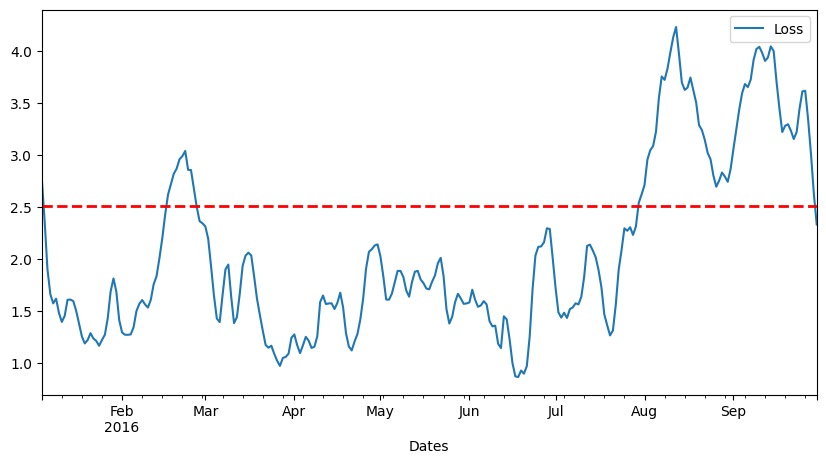

In [18]:
##plot the results for monitored period data to see number of anomalies and if the Feb 14 anaomaly is the only one being captured
recons_monitored_data=model.predict(X_monitored_period)
print(X_monitored_period.shape)
data_loss_monitored=tf.keras.losses.mae(recons_monitored_data,X_monitored_period)
# print(data_loss)
data_loss_monitored_mean=tf.reduce_mean(data_loss_monitored,axis=1)
print(data_loss_monitored_mean)
chk_monitored_data_dated=pd.DataFrame({'Dates':monitored_period_df.index[seq_len:],'Loss':data_loss_monitored_mean})
display(chk_monitored_data_dated)
chk_monitored_data_dated.plot(x='Dates',y='Loss',figsize=(10,5))
plt.axhline(y=threshold, color='red', linestyle='--', linewidth=2, label='Threshold')

###plot plotly plots for train data to analyze 

fig = px.line(chk_monitored_data_dated, x='Dates', y='Loss', title='Loss vs. Dates', labels={'Loss': 'Loss', 'Dates': 'Dates'}) # Add a threshold line threshold = 0.5 # Replace with the actual threshold value 
fig.add_hline(y=threshold, line=dict(color='red', width=2, dash='dash'), annotation_text='Threshold', annotation_position='top left') # Customize the layout
fig.update_layout( xaxis_title='Dates', yaxis_title='Loss', legend_title='Legend', template='plotly_white' ) # Show the plot fig.show()

In [19]:
##There has been a data drift since july 2016 and hence the model has to be retrained with the new data to capture the anomalies    

In [29]:
train2_df = df.loc['2016-07-30':'2016-08-21']
val2_df=df.loc['2016-08-22':'2016-08-30']
norm2_test_df=df.loc['2016-09-01':'2016-09-30']


In [30]:
X2_train_orig=create_seq_data(train2_df,seq_len)
X2_val_orig=create_seq_data(val2_df,seq_len)
X2_norm_test_orig=create_seq_data(norm2_test_df,seq_len)

X2_train=X2_train_orig.reshape(-1,seq_len,train2_df.shape[1])
X2_val=X2_val_orig.reshape(-1,seq_len,val2_df.shape[1])
X2_norm_test=X2_norm_test_orig.reshape(-1,seq_len,norm2_test_df.shape[1])



In [31]:
# Set random seed for reproducibility 
np.random.seed(42)
tf.random.set_seed(42)

n2_features=X2_train.shape[2]
n2_timesteps=X2_train.shape[1]
batch_size=16
early_stopping=EarlyStopping(monitor='val_loss',patience=2,restore_best_weights=True)
loss='mae'
metrics=['mae']
model2=tf.keras.models.Sequential([
    layers.LSTM(8,return_sequences=True,input_shape=(seq_len,n2_features)),
    # layers.LSTM(16,return_sequences=True),
    layers.LSTM(8,return_sequences=False,name="Latent"),
    RepeatVector(seq_len),
    #layers.LSTM(8,return_sequences=True),
    # layers.LSTM(16,return_sequences=True),
    layers.LSTM(8,return_sequences=True),
    layers.TimeDistributed(layers.Dense(n2_features))
    ])
model2.compile(optimizer='adam',loss=loss,metrics=metrics)
history2=model2.fit(X2_train,X2_train,epochs=500,batch_size=batch_size,validation_data=(X2_val,X2_val),shuffle=True,callbacks=[early_stopping])


Epoch 1/500


c:\Users\ccb\OneDrive\Desktop\Avatheon\v_env\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 719ms/step - loss: 8.5950 - mae: 8.5950 - val_loss: 7.7413 - val_mae: 7.7413
Epoch 2/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - loss: 8.5902 - mae: 8.5902 - val_loss: 7.7364 - val_mae: 7.7364
Epoch 3/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - loss: 8.5855 - mae: 8.5855 - val_loss: 7.7315 - val_mae: 7.7315
Epoch 4/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - loss: 8.5807 - mae: 8.5807 - val_loss: 7.7266 - val_mae: 7.7266
Epoch 5/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - loss: 8.5758 - mae: 8.5758 - val_loss: 7.7215 - val_mae: 7.7215
Epoch 6/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - loss: 8.5709 - mae: 8.5709 - val_loss: 7.7163 - val_mae: 7.7163
Epoch 7/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - loss: 8.5660 - mae: 8.5660 - val_loss: 7.7110 - val_mae: 7.7110
Epoch 8/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - loss: 8.5609 - mae: 8.5609 - val_loss: 7.7056 - val_mae: 7.7056
Epoch 9/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - loss: 8.5558 - mae: 8.5

[8.581985473632812, 8.577224731445312, 8.572453498840332, 8.567656517028809, 8.56281852722168, 8.55792236328125, 8.552950859069824, 8.547887802124023, 8.542713165283203, 8.537398338317871, 8.531920433044434, 8.5262451171875, 8.520336151123047, 8.51414680480957, 8.507628440856934, 8.500724792480469, 8.493368148803711, 8.485487937927246, 8.477006912231445, 8.4678316116333, 8.457860946655273, 8.446978569030762, 8.435056686401367, 8.421964645385742, 8.40757942199707, 8.391801834106445, 8.37454891204834, 8.355768203735352, 8.335433006286621, 8.313543319702148, 8.29011344909668, 8.26517105102539, 8.238727569580078, 8.210789680480957, 8.181349754333496, 8.150394439697266, 8.11790657043457, 8.083881378173828, 8.048325538635254, 8.01126480102539, 7.972743988037109, 7.932823181152344, 7.891580104827881, 7.849104404449463, 7.805492401123047, 7.760849952697754, 7.7152862548828125, 7.668912410736084, 7.621847629547119, 7.574212074279785, 7.526133060455322, 7.477745056152344, 7.429187774658203, 7.38

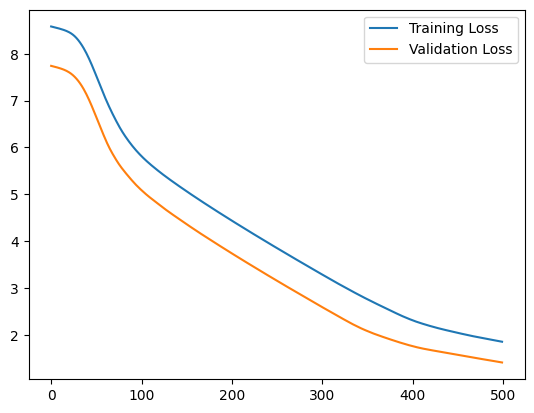

In [32]:
print(history2.history["loss"])
plt.plot(history2.history["loss"],label="Training Loss")
plt.plot(history2.history["val_loss"],label="Validation Loss")
plt.legend()

In [33]:
recons_norm2_test_data=model2.predict(X2_norm_test)
norm2_test_data_loss=tf.keras.losses.mae(recons_norm2_test_data,X2_norm_test)

# recons_anom2_test_data=model2.predict(X2_anom_test)
# anom2_test_data_loss=tf.keras.losses.mae(recons_anom2_test_data,X2_anom_test)

norm2_test_data_loss_mean=np.mean(norm2_test_data_loss,axis=1)
# anom2_test_data_loss_mean=np.mean(anom2_test_data_loss,axis=1)
threshold2=np.mean(norm2_test_data_loss_mean)##+2*np.std(norm2_test_data_loss_mean)
print(threshold2)  ###less confoidence on the threshold value due to limited training data after the drift

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 498ms/step
1.9735376755859122


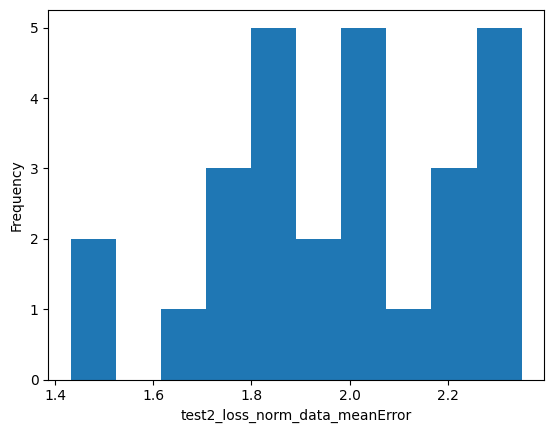

In [34]:
test2_loss_norm_data_mean=np.mean(norm2_test_data_loss,axis=1)


plt.hist(test2_loss_norm_data_mean)
plt.xlabel("test2_loss_norm_data_meanError")
plt.ylabel("Frequency")
# plt.xlim(1.5,2)
plt.show()




###Model predictions for the uiltimate test data not analyzed yet( Prtedcitiona period)

In [35]:
recons_new_test_data=model2.predict(X_test)
test_data_loss_new=tf.keras.losses.mae(recons_new_test_data,X_test)

# recons_anom2_test_data=model2.predict(X2_anom_test)
# anom2_test_data_loss=tf.keras.losses.mae(recons_anom2_test_data,X2_anom_test)

test_data_loss_new_mean=np.mean(test_data_loss_new,axis=1)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step 


In [36]:
new_results_dated=pd.DataFrame({'Dates':test_df.index[seq_len:],'Loss':test_data_loss_new_mean})
display(new_results_dated)

##Normal plot
# results_dated.plot(x='Dates',y='Loss',figsize=(10,5))
# plt.axhline(y=threshold, color='red', linestyle='--', linewidth=2, label='Threshold')

####potly plots for interactivity

fig = px.line(new_results_dated, x='Dates', y='Loss', title='Loss vs. Dates for new model', labels={'Loss': 'Loss', 'Dates': 'Dates'}) 
# Add a threshold line threshold = 0.5 # Replace with the actual threshold value
fig.add_hline(y=threshold2, line=dict(color='red', width=2, dash='dash'), annotation_text='Threshold_2', annotation_position='top left') # Customize the layout 
fig.update_layout( xaxis_title='Dates', yaxis_title='Loss', legend_title='Legend', template='plotly_white') # Show the plot 


,Dates,Loss
0,2016-10-04,2.010191
1,2016-10-05,2.026758
2,2016-10-06,2.055516
3,2016-10-07,2.129108
4,2016-10-08,2.204311
...,...,...
83,2016-12-26,4.397607
84,2016-12-27,4.118873
85,2016-12-28,4.026589
86,2016-12-29,4.094634


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'Dates=%{x}<br>Loss=%{y}<extra></extra>',
              'legendgroup': '',
              'line': {'color': '#636efa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'scatter',
              'x': array([datetime.datetime(2016, 10, 4, 0, 0),
                          datetime.datetime(2016, 10, 5, 0, 0),
                          datetime.datetime(2016, 10, 6, 0, 0),
                          datetime.datetime(2016, 10, 7, 0, 0),
                          datetime.datetime(2016, 10, 8, 0, 0),
                          datetime.datetime(2016, 10, 9, 0, 0),
                          datetime.datetime(2016, 10, 10, 0, 0),
                          datetime.datetime(2016, 10, 11, 0, 0),
                          datetime.datetime(2016, 10, 12, 0, 0),
                          datetime.datetime(2016, 10, 13, 0, 0),
                          datetime.datetime(2016, 10, 14, 0, 0),
                          datetime.datetime(2016, 10, 15, 0, 0),
                          datetime.datetime(2016, 10, 16, 0, 0),
                          datetime.datetime(2016, 10, 17, 0, 0),
                          datetime.datetime(2016, 10, 18, 0, 0),
                          datetime.datetime(2016, 10, 19, 0, 0),
                          datetime.datetime(2016, 10, 20, 0, 0),
                          datetime.datetime(2016, 10, 21, 0, 0),
                          datetime.datetime(2016, 10, 22, 0, 0),
                          datetime.datetime(2016, 10, 23, 0, 0),
                          datetime.datetime(2016, 10, 24, 0, 0),
                          datetime.datetime(2016, 10, 25, 0, 0),
                          datetime.datetime(2016, 10, 26, 0, 0),
                          datetime.datetime(2016, 10, 27, 0, 0),
                          datetime.datetime(2016, 10, 28, 0, 0),
                          datetime.datetime(2016, 10, 29, 0, 0),
                          datetime.datetime(2016, 10, 30, 0, 0),
                          datetime.datetime(2016, 10, 31, 0, 0),
                          datetime.datetime(2016, 11, 1, 0, 0),
                          datetime.datetime(2016, 11, 2, 0, 0),
                          datetime.datetime(2016, 11, 3, 0, 0),
                          datetime.datetime(2016, 11, 4, 0, 0),
                          datetime.datetime(2016, 11, 5, 0, 0),
                          datetime.datetime(2016, 11, 6, 0, 0),
                          datetime.datetime(2016, 11, 7, 0, 0),
                          datetime.datetime(2016, 11, 8, 0, 0),
                          datetime.datetime(2016, 11, 9, 0, 0),
                          datetime.datetime(2016, 11, 10, 0, 0),
                          datetime.datetime(2016, 11, 11, 0, 0),
                          datetime.datetime(2016, 11, 12, 0, 0),
                          datetime.datetime(2016, 11, 13, 0, 0),
                          datetime.datetime(2016, 11, 14, 0, 0),
                          datetime.datetime(2016, 11, 15, 0, 0),
                          datetime.datetime(2016, 11, 16, 0, 0),
                          datetime.datetime(2016, 11, 17, 0, 0),
                          datetime.datetime(2016, 11, 18, 0, 0),
                          datetime.datetime(2016, 11, 19, 0, 0),
                          datetime.datetime(2016, 11, 20, 0, 0),
                          datetime.datetime(2016, 11, 21, 0, 0),
                          datetime.datetime(2016, 11, 22, 0, 0),
                          datetime.datetime(2016, 11, 23, 0, 0),
                          datetime.datetime(2016, 11, 24, 0, 0),
                          datetime.datetime(2016, 11, 25, 0, 0),
                          datetime.datetime(2016, 11, 26, 0, 0),
                          datetime.datetime(2016, 11, 27, 0, 0),
                          datetime.datetime(2016, 11, 28, 0

In [37]:
potential_anom=new_results_dated.loc[new_results_dated['Loss']>threshold2]
# print(potential_anom)
# Function to identify consecutive date ranges
def find_consecutive_ranges(dates, min_days=3, max_days=14):
    consecutive_ranges = []
    start_date = dates[0]
    prev_date = dates[0]

    for date in dates[1:]:
        if (date - prev_date).days != 1:
            range_length = (prev_date - start_date).days + 1
            if min_days <= range_length <= max_days:
                consecutive_ranges.append((start_date, prev_date))
            print(f"Range: {start_date} to {prev_date} - Length: {range_length} days")
            start_date = date
        prev_date = date

    range_length = (prev_date - start_date).days + 1
    if min_days <= range_length <= max_days:
        consecutive_ranges.append((start_date, prev_date))
    print(f"Range: {start_date} to {prev_date} - Length: {range_length} days")

    return consecutive_ranges

# Identify consecutive date ranges in the DataFrame
consecutive_dates = potential_anom['Dates'].tolist()
consecutive_ranges = find_consecutive_ranges(consecutive_dates)

# Print consecutive ranges to debug
# print(f"Consecutive Ranges: {consecutive_ranges}")

# Select dates that are part of the desired ranges
selected_dates = []
for start_date, end_date in consecutive_ranges:
    selected_dates.extend(pd.date_range(start=start_date, end=end_date).tolist())

selected_df = potential_anom[potential_anom['Dates'].isin(selected_dates)]

# Display the selected DataFrame
print(selected_df.Dates)


Range: 2016-10-04 00:00:00 to 2016-10-28 00:00:00 - Length: 25 days
Range: 2016-11-13 00:00:00 to 2016-11-13 00:00:00 - Length: 1 days
Range: 2016-11-21 00:00:00 to 2016-11-22 00:00:00 - Length: 2 days
Range: 2016-11-29 00:00:00 to 2016-11-29 00:00:00 - Length: 1 days
Range: 2016-12-01 00:00:00 to 2016-12-05 00:00:00 - Length: 5 days
Range: 2016-12-08 00:00:00 to 2016-12-30 00:00:00 - Length: 23 days
58   2016-12-01
59   2016-12-02
60   2016-12-03
61   2016-12-04
62   2016-12-05
Name: Dates, dtype: datetime64[ns]
